# Final exercise: Help Sally restore her graduation photo
You're going to use all the knowledge adquired during the course to complete a final challenge: reconstruct a very damaged photo.

Help Sally restore her favorite portrait which was damaged with noise, distorsion and missing information due to a breach in her laptop. 

You will be fixing these problems by transforming the images to be upright, applying noise reduction and reconstructing the damaged parts. 

And at the end, you will apply face detection on the resulting image to make sure the face of Sally is there.




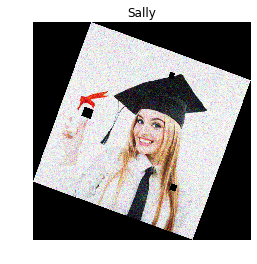

In [7]:
##################################################
# Pre loaded code
# This is used to create the damaged image that the students will recover applying what they learnt in the course
# Student wouldn't see this code which is used to provide them functions to plot, and create masks

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from skimage import data, io
from skimage.util import random_noise
from skimage import transform as tf
from skimage.feature import Cascade
# Load the trained file for face detection from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

def get_mask(image):
    # Create mask with three defect regions: left, middle, right respectively
    mask_for_solution = np.zeros(image.shape[:-1])
    mask_for_solution[450:475, 470:495] = 1
    mask_for_solution[320:355, 140:175] = 1
    mask_for_solution[130:155, 345:370] = 1
    return mask_for_solution

def show_detected_face(result, detected):
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title("Sally")
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
    
def show_image(image):
    plt.imshow(image)
    plt.title("Sally")
    plt.axis('off')
    plt.show()

sigma = 0.155 
original = io.imread('sally.jpg') # To read the image from local memory
noisy_img = random_noise(original, var=sigma**2)

# Create mask with three defect regions: left, middle, right respectively
mask_to_start = np.zeros(noisy_img.shape[:-1])
mask_to_start[380:400, 400:420] = 1
mask_to_start[250:280, 70:100] = 1
mask_to_start[60:80, 280:295] = 1

# Defect image over the same region in each color channel
defect = noisy_img.copy()
for layer in range(defect.shape[-1]):
    defect[np.where(mask_to_start)] = 0

# rotates the image
damaged_image = tf.rotate(defect, -20, resize=True)

show_image(damaged_image)
##################################################

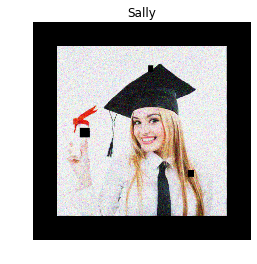

In [3]:
from skimage.restoration import denoise_tv_chambolle, inpaint

# The damaged image
#show_image(damaged_image)

# Transform the image so its not rotated
upright_img = tf.rotate(damaged_image, 20)

show_image(upright_img)

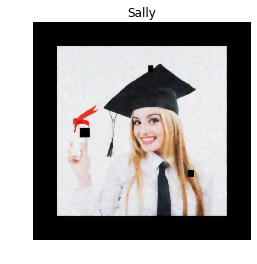

In [8]:
# Remove the noise from the image, using the chambolle method
upright_img_without_noise = denoise_tv_chambolle(upright_img,weight=0.1, multichannel=True)
show_image(upright_img_without_noise)

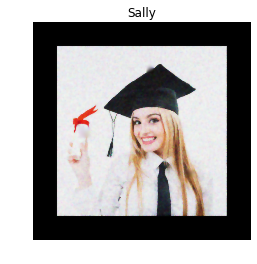

In [9]:
# Reconstruct the image missing parts
mask = get_mask(upright_img)
result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask, multichannel=True)
show_image(result)

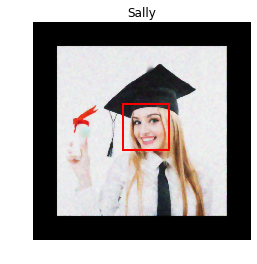

In [9]:
# Initialize the detector cascade.
detector = Cascade(trained_file)

detected = detector.detect_multi_scale(img=result,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(100, 100),
                                       max_size=(200, 200))
show_detected_face(result, detected)

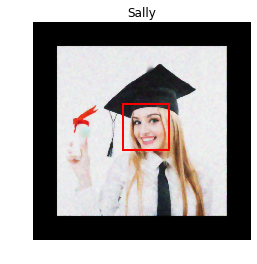

In [8]:
# All in one solved exercise
from skimage.restoration import denoise_tv_chambolle, inpaint

# The damaged image
#show_image(damaged_image)

# Transform the image so its not rotated
upright_img = tf.rotate(damaged_image, 20)

# Remove the noise from the image, using the chambolle method
upright_img_without_noise = denoise_tv_chambolle(upright_img,weight=0.1, multichannel=True)

# Reconstruct the image missing parts
mask = get_mask(upright_img)
result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask, multichannel=True)

# Initialize the detector cascade.
detector = Cascade(trained_file)

detected = detector.detect_multi_scale(img=result,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(100, 100),
                                       max_size=(200, 200))
show_detected_face(result, detected)